## Import Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Upload Data

In [3]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [5]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Check Null Values

In [7]:
df.isnull()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9707,False,False,False,False,False,False,False,False
9708,False,False,False,False,False,False,False,False
9709,False,False,False,False,False,False,False,False
9710,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

## Check Duplication

In [12]:
duplicates = df.duplicated() 
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
9707    False
9708    False
9709    False
9710    False
9711    False
Length: 9712, dtype: bool


In [13]:
duplicates = df.duplicated().sum()
print(duplicates)

44


## Finding  Correlations 

In [19]:
df.corr(numeric_only = True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


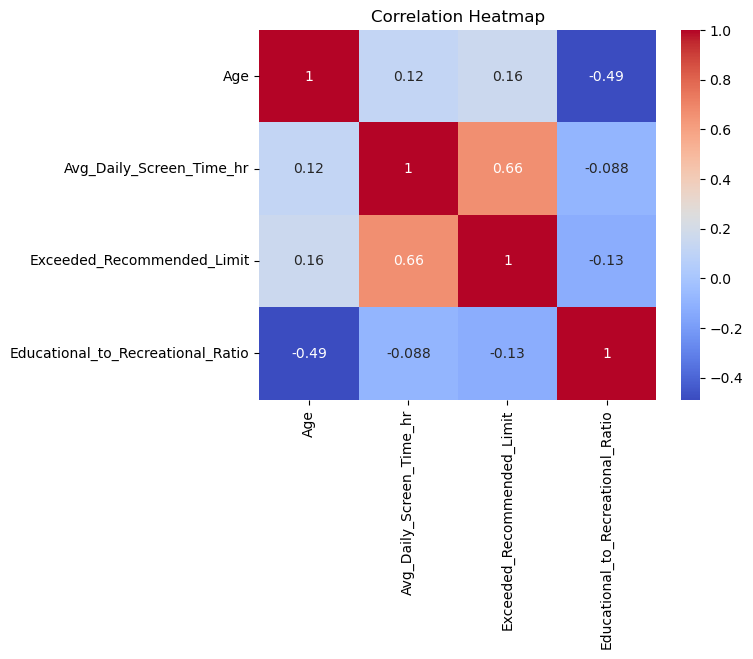

In [9]:
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [20]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


## Information About Columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


## Find Data Types Of All Column

In [26]:
df.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

## IQR

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

def calculate_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return pd.DataFrame({"Q1": Q1, "Q3": Q3, "IQR": IQR})


iqr_result = calculate_iqr(numeric_cols)

print("Interquartile Range (IQR) for all numeric columns:\n")
print(iqr_result)

Interquartile Range (IQR) for all numeric columns:

                                      Q1     Q3   IQR
Age                                10.00  16.00  6.00
Avg_Daily_Screen_Time_hr            3.41   5.38  1.97
Educational_to_Recreational_Ratio   0.37   0.48  0.11


## Insights

In [ ]:
1. This is the data of 'Indian_Kids_Screen_Time' which has 8 Columns and 9713 Rows
2. In this data 44 Duplicates Rows are present, And after deleting all duplicates rows then there only 9668 unique rows present.
3. In this Data there is no null values present in all column except Health_Impacts column , It has 3218 null values present.
4. It has all column dtypes: bool(1), float64(2), int64(1), object(4).
5. Older kids → shift more towards recreational screen use.
6. Excessive screen time → strongly linked with exceeding recommended health limits.
7. Healthy balance (educational vs recreational use) decreases as screen time goes up.
8. Most kids are between 10 to 16 years old.
9. Most kids spend 3.5 to 5.5 hours daily on screens, This is above the recommended 2 hours for children.
10.Only 37%–48% of screen time is educational. This means kids spend more time on entertainment than learning.